In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\DM\\Cosmetics.csv")
df.head()


,Trans,Bag,Blush,Nail_Polish,Brushes,Concealer,Eyebrow_Pencils,Bronzer,Lip_liner,Mascara,Eye_shadow,Foundation,Lip_Gloss,Lipstick,Eyeliner
0,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1
1,2,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2,3,0,1,0,0,1,1,1,1,1,1,1,1,1,0
3,4,0,0,1,1,1,0,1,0,0,0,1,0,0,1
4,5,0,1,0,0,1,0,1,1,1,1,0,1,1,0


# data preprocessing

In [3]:
print(df.shape)
df.isnull().sum()


(1000, 15)


Trans              0
Bag                0
Blush              0
Nail_Polish        0
Brushes            0
Concealer          0
Eyebrow_Pencils    0
Bronzer            0
Lip_liner          0
Mascara            0
Eye_shadow         0
Foundation         0
Lip_Gloss          0
Lipstick           0
Eyeliner           0
dtype: int64

15


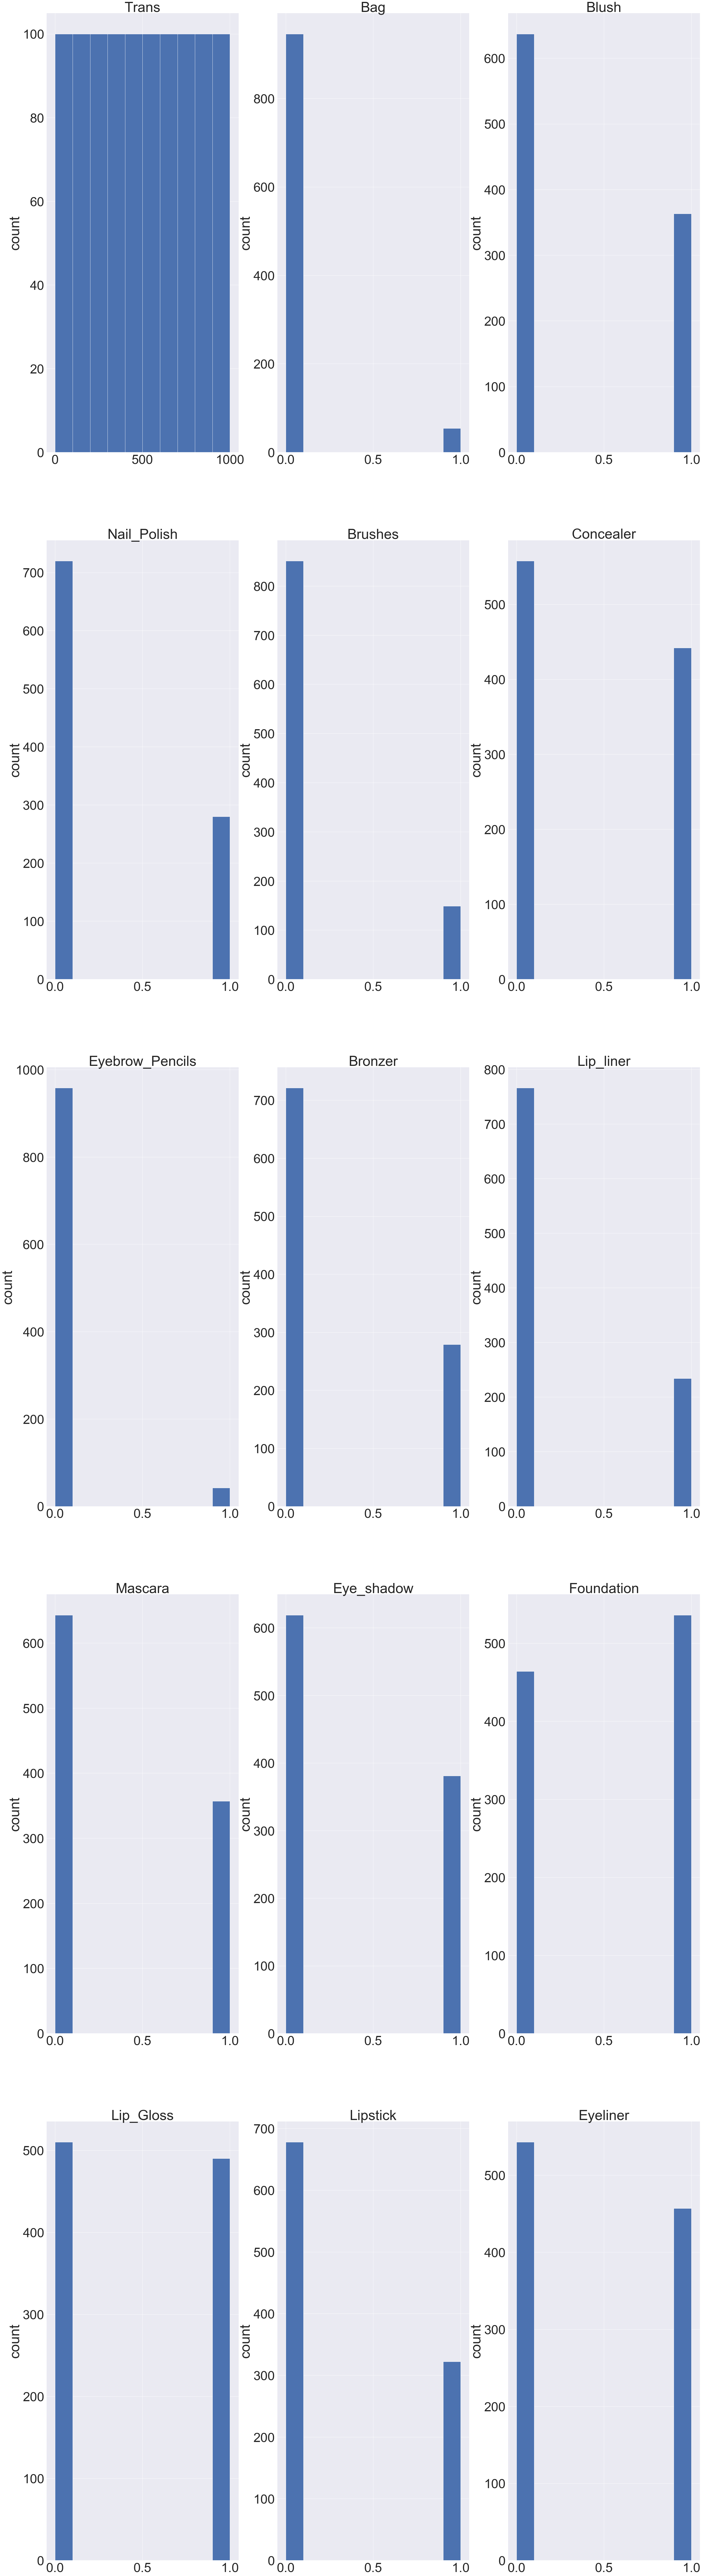

In [4]:
import seaborn as sns
col=df.columns.tolist()
print(len(col))
figure = plt.figure(figsize=(50, 200))
for i in range(0 , len(col)) :
  sns.set(font_scale=5)
  ax=plt.subplot(5,3,i+1)
  ax = df[col[i]].hist()
  ax.set_axisbelow(True) 
  ax.set_ylabel('count')
  ax.set_title(col[i])
plt.show()

In [4]:
df.drop(["Trans" ],axis=1,inplace=True)
df.head()

,Bag,Blush,Nail_Polish,Brushes,Concealer,Eyebrow_Pencils,Bronzer,Lip_liner,Mascara,Eye_shadow,Foundation,Lip_Gloss,Lipstick,Eyeliner
0,0,1,1,1,1,0,1,1,1,0,0,0,0,1
1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2,0,1,0,0,1,1,1,1,1,1,1,1,1,0
3,0,0,1,1,1,0,1,0,0,0,1,0,0,1
4,0,1,0,0,1,0,1,1,1,1,0,1,1,0


In [5]:
data = df.values
print(data)
listname=df.columns.tolist()
print(listname)

[[0 1 1 ... 0 0 1]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 1 1 0]
 ...
 [0 1 1 ... 0 1 1]
 [1 1 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]]
['Bag', 'Blush', 'Nail_Polish', 'Brushes', 'Concealer', 'Eyebrow_Pencils', 'Bronzer', 'Lip_liner', 'Mascara', 'Eye_shadow', 'Foundation', 'Lip_Gloss', 'Lipstick', 'Eyeliner']


# Apriori

In [6]:
def Supp_K_itemset(itemSet, listData):       #support của mỗi candidate k-itemset
    count = 0

    for data in listData:
        add = 1
        for i in itemSet:
            if data[i] == 0:
                add = 0
                break
        count += add

    return count/len(listData)


def join_itemset(itemset1, itemset2):           #Lk-1 nối Lk-1  để sinh ra candidate k-itemset
    new = []
    if len(itemset1) != len(itemset2):
        return None

    if len(itemset1) == 1:
        new.append(itemset1[0])
        new.append(itemset2[0])
        return new

    new.append(itemset1[0])
    for i in range(1, len(itemset1)):
        if itemset1[i] != itemset2[i - 1]:
            return None
        new.append(itemset1[i])
    new.append(itemset2[len(itemset2) - 1])

    return new


def frequent_itemsets(data, minSupp):         #Tìm frequent itemset I
    listItemSets = []
    listSupp = []
    botIndex = 0
    numberNewItemsSet = 0

    for i in range(len(data[0])):
        itemset = [i]
        supp = Supp_K_itemset(itemset, data)
        if supp >= minSupp:
            listItemSets.append(itemset)
            listSupp.append(supp)
            numberNewItemsSet += 1

    old = numberNewItemsSet

    while numberNewItemsSet != 0:
        numberNewItemsSet = 0
        top = len(listItemSets)
        for i in range(botIndex, top):
            for j in range(i + 1, top):
                itemset = join_itemset(listItemSets[i], listItemSets[j])
                # print(itemset)
                if itemset is None:
                    continue
                supp = Supp_K_itemset(itemset, data)
                if supp >= minSupp:
                    listItemSets.append(itemset)
                    listSupp.append(supp)
                    numberNewItemsSet += 1
        botIndex += old
        old = numberNewItemsSet

    return listItemSets, listSupp

class Rule:
    premise = []
    consequence = []
    supp = 0.0
    conf = 0.0

    def __init__(self, premise, consequence, supp):
        self.premise = premise
        self.consequence = consequence
        self.supp = supp

    def SetConf(self, conf):
        self.conf = conf 
def GenRule(rule, minConf, listItemSets, listSupp, listRules):    #sinh ra các luật  với conf > =min_conf
    premise = rule.premise.copy()
    consequence = rule.consequence.copy()
    if len(rule.premise) > 1:
        for i in rule.premise:
            premise.remove(i)
            consequence.append(i)
            newRule = Rule(premise, consequence, rule.supp)
            premise = rule.premise.copy()
            consequence = rule.consequence.copy()
            #print(newRule.premise)
            # print(newRule.consequence)
            # print(newRule.supp)
            conf = (newRule.supp)/(listSupp[listItemSets.index(newRule.premise)])
            if conf < minConf:
                continue
            # print(newRule.supp)
            # print(listSupp[listItemSets.index(newRule.premise)])
            # print(conf)
            newRule.SetConf(conf)
            listRules.append(newRule)
            GenRule(newRule, minConf, listItemSets, listSupp, listRules)
    #print(listRules)

def List_Rules(listItemSets, listSupp, minConf):    #List Rules
    listRules = []

    for itemset in listItemSets:
        if len(itemset) == 1:
            continue
        rule = Rule(itemset, [], listSupp[listItemSets.index(itemset)])
        GenRule(rule, minConf, listItemSets, listSupp, listRules)
    
    return listRules

def Apriori(listname, data, minSupp, minConf):
    listItemsSet, listSupp = frequent_itemsets(data, minSupp)
    listRules = List_Rules(listItemsSet, listSupp, minConf)
    print(listItemsSet)
    print("num_Rules : ",len(listRules))
    print("__________________________________________________________________________________________")
    for rule in listRules:
        #print(rule)
        ruleString = ""
        for i in rule.premise:
            ruleString += listname[i] + ";"
        ruleString += "=>"
        for i in rule.consequence:
            ruleString += listname[i] + ";"

        ruleString += "  Supp = " + str(rule.supp) + "  Conf = " + str(rule.conf)

        print(ruleString)
        print(str(rule.premise) + " =>   " + str(rule.consequence))
    

In [8]:
Apriori(listname, data, 0.1, 0.8)

[[1], [2], [3], [4], [6], [7], [8], [9], [10], [11], [12], [13], [1, 2], [1, 4], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [2, 3], [2, 4], [2, 6], [2, 8], [2, 9], [2, 10], [2, 11], [2, 13], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 13], [7, 8], [7, 9], [7, 11], [7, 13], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [9, 10], [9, 11], [9, 12], [9, 13], [10, 11], [10, 12], [10, 13], [11, 12], [11, 13], [12, 13], [1, 4, 6], [1, 4, 7], [1, 4, 8], [1, 4, 9], [1, 4, 10], [1, 4, 11], [1, 4, 13], [1, 8, 9], [1, 8, 10], [1, 9, 10], [1, 10, 11], [2, 8, 9], [4, 6, 7], [4, 6, 8], [4, 6, 13], [4, 7, 13], [4, 8, 9], [4, 8, 10], [4, 8, 11], [4, 8, 13], [4, 9, 10], [4, 9, 11], [4, 9, 13], [4, 10, 11], [4, 10, 13], [4, 11, 13], [4, 12, 13], [6, 8, 9], [8, 9, 10], [8, 9, 11], [8, 9, 12], [8, 9, 13], [8, 10, 11], [9, 10, 11], [10, 11, 12], [10, 11, 13], [1, 4, 8, 9], [4, 8, 9, 13], [8, 9, 10, 11]]
num_Rules :  